# Demo of a financial fraud detection model

## Loading Model data input as a csv file

In [1]:
import pandas as pd
df_raw = pd.read_csv("/home/sai/tejasa/bs140513_032310.csv")

### Snapshot of the input data 

In [2]:
df_raw.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


### Statistics of the input data

In [3]:
df_raw.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


## Data exploration

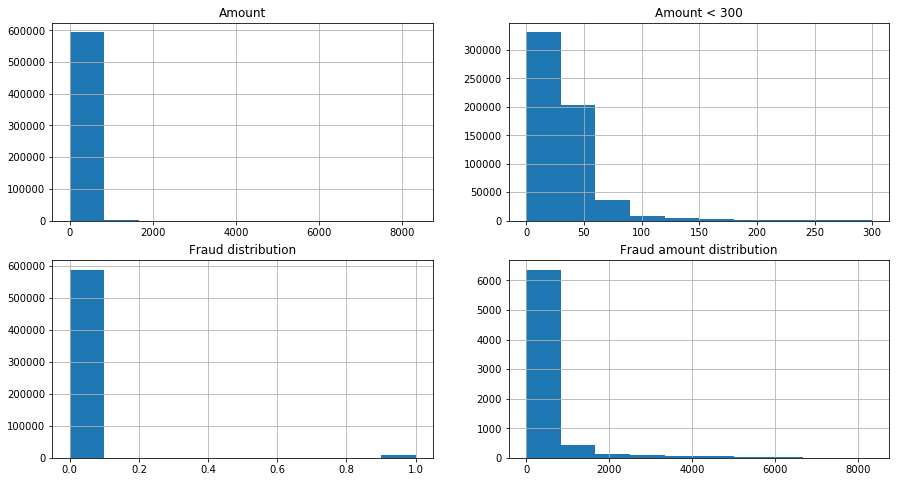

In [5]:
from data_explore import data_explore
plot = data_explore(df_raw)
plot.show()

## Preprocessing the data and create new features

In [6]:
X_test = pd.read_pickle("poc_xtest.pkl")
y_test = pd.read_pickle("poc_ytest.pkl")

## Loading model

In [7]:
import pickle as pk
file = open("poc_model.model", "rb")
model2 = pk.load(file)
file.close()

## Model performance

In [8]:
y_pred = model2.predict(X_test)
predictions = [round(value) for value in y_pred]
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.00%


In [9]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

0.964326951514


In [10]:
from sklearn.metrics import roc_curve
fpr, tpr, ther = roc_curve(y_test, y_pred)

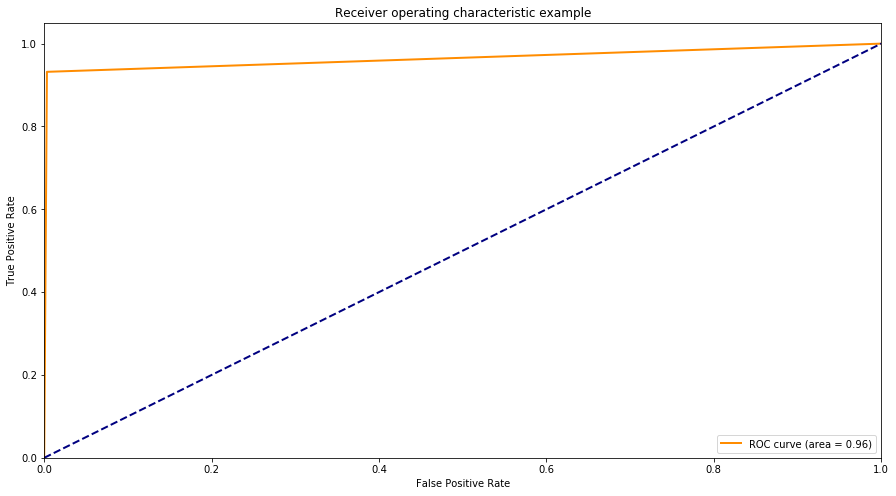

In [11]:
from matplotlib import pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[6430,   21],
       [  51,  698]])

Normalized confusion matrix
[[ 0.99674469  0.00325531]
 [ 0.06809079  0.93190921]]


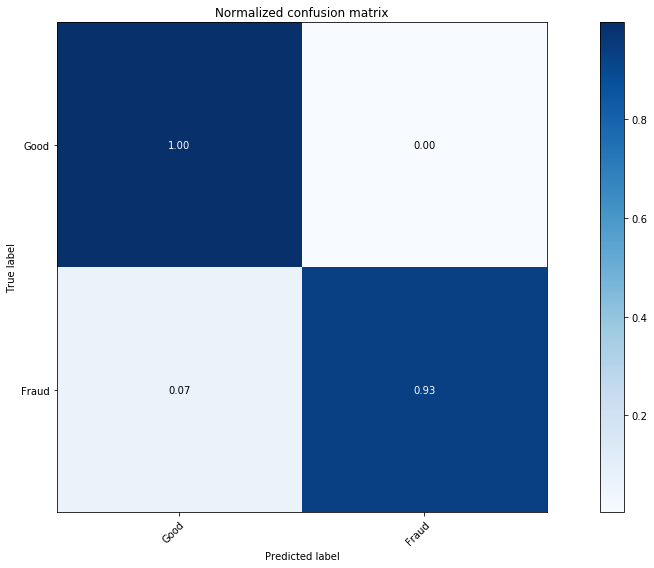

In [13]:
import numpy as np
from confusion_plot import plot_confusion_matrix
class_names = np.array(["Good","Fraud"])
#plot_confusion_matrix(y_test, y_pred, classes=class_names,
#                      title='Confusion matrix, without normalization')

plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [14]:
model2.feature_importances_

array([  8.73854458e-02,   5.95923699e-02,   6.81055617e-03,
         2.30357051e-03,   0.00000000e+00,   2.18338426e-02,
         0.00000000e+00,   1.30201811e-02,   1.10571384e-01,
         3.76583710e-02,   4.19650450e-02,   2.74926145e-02,
         2.55395863e-02,   1.39215784e-02,   9.86529142e-03,
         6.30978029e-03,   0.00000000e+00,   1.18183186e-02,
         0.00000000e+00,   3.15489024e-02,   0.00000000e+00,
         0.00000000e+00,   2.33361702e-02,   0.00000000e+00,
         0.00000000e+00,   1.26696378e-02,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   6.81055617e-03,
         7.86218606e-03,